In [578]:
import ot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [884]:
fjc = pd.read_csv('fjc_2018.csv')
ussc = pd.read_csv('ussc_2018.csv')


/var/folders/rp/lgskb8cx1vzgzb8nb18p5vxw0000gn/T/ipykernel_8323/3052419373.py:1: DtypeWarning: Columns (4,11,42,54,65,96,108,113,120,125) have mixed types. Specify dtype option on import or set low_memory=False.
  fjc = pd.read_csv('fjc_2018.csv')


In [885]:
matches = pd.read_csv('match_2018.csv')
matches

,USSCIDN,floorSENTTOT,roundSENTTOT,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,...,FJDcode9,FJDcode10,DOCKET,DEFLGKY,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,ID
0,2436847.0,188.0,188.0,1,2018,88,188.0,0.0,0,21841.0,...,NaN,NaN,1600609.0,108821600609CR0010,21841.0,NaN,NaN,NaN,NaN,4555469.0
1,2438538.0,0.0,0.0,1,2018,22,0.0,0.0,0,81326.0,...,NaN,NaN,1700221.0,042211700221CR0010,81326.0,NaN,NaN,NaN,NaN,4417115.0
2,2438539.0,300.0,300.0,1,2018,68,300.0,0.0,0,21846.0,...,NaN,NaN,1500157.0,086811500157CR0010,21841.0,18924.0,21841.0,182.0,21846.0,4497437.0
3,2438541.0,63.0,63.0,1,2018,51,63.0,0.0,0,18922.0,...,NaN,NaN,1720143.0,065121720143CR0010,18922.0,NaN,NaN,NaN,NaN,4477386.0
4,2438542.0,2.0,2.0,1,2018,82,2.0,0.0,0,81326.0,...,NaN,NaN,1700288.0,108211700288CR0010,81326.0,NaN,NaN,NaN,NaN,4543256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35373,2497168.0,0.0,1.0,10,2018,0,0.0,5000.0,0,163372.0,...,NaN,NaN,1800066.0,NaN,163372.0,163372.0,NaN,NaN,NaN,4582469.0
35374,2498277.0,11.0,12.0,10,2018,6,11.0,0.0,0,21846.0,...,NaN,NaN,1800121.0,NaN,21846.0,21841.0,NaN,NaN,NaN,4591568.0
35375,2497145.0,1.0,2.0,10,2018,14,1.0,0.0,0,81326.0,...,NaN,NaN,1800273.0,NaN,81326.0,NaN,NaN,NaN,NaN,4614269.0
35376,2510716.0,13.0,14.0,12,2018,50,13.0,0.0,0,18922.0,...,NaN,NaN,1700164.0,NaN,18922.0,NaN,NaN,NaN,NaN,4699529.0


In [886]:
fjc = fjc[['DISTRICT','SENTMON', 'SENTYR', 'PRISTOT', 'FINETOT', 'PROBTOT', 'DEFLGKY', 'FJDcode1', 'FJDcode2', 'FJDcode3', 'FJDcode4', 'FJDcode5', 'FJDcode6', 'FJDcode7', 'FJDcode8', 'FJDcode9', 'FJDcode10', 'DOCKET', 'matchFlag']]
ussc = ussc[['DISTRICT', 'SENTMON', 'SENTYR', 'floorSENTTOT', 'FINE', 'PROBATN', 'USSCIDN','SENTTOT_new', 'roundSENTTOT','USSCcode1', 'USSCcode2', 'USSCcode3', 'USSCcode4', 'USSCcode5', 'matchFlag']]
ussc = ussc.rename({'floorSENTTOT': 'PRISTOT', 'FINE': 'FINETOT', 'PROBATN': 'PROBTOT'}, axis=1)

In [889]:
ussc

,DISTRICT,SENTMON,SENTYR,PRISTOT,FINETOT,PROBTOT,USSCIDN,SENTTOT_new,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,matchFlag
0,88,1,2018,188.0,0,0,2436847,188.00,188.0,81326.0,NaN,NaN,NaN,NaN,1
1,22,1,2018,0.0,0,0,2438538,0.03,0.0,21846.0,21841.0,21841.0,NaN,NaN,1
2,68,1,2018,300.0,0,0,2438539,300.00,300.0,81326.0,NaN,NaN,NaN,NaN,1
3,51,1,2018,63.0,0,0,2438541,63.00,63.0,21841.0,NaN,NaN,NaN,NaN,1
4,82,1,2018,2.0,0,0,2438542,2.23,2.0,21846.0,21841.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71215,45,11,2018,60.0,0,0,2595542,60.00,60.0,18371.0,NaN,NaN,NaN,NaN,0
71216,42,12,2018,0.0,0,12,2595619,0.03,0.0,1813.0,NaN,NaN,NaN,NaN,0
71217,42,11,2018,NaN,0,24,2595697,0.00,NaN,81325.0,NaN,NaN,NaN,NaN,0
71218,16,11,2018,NaN,250,0,2595911,0.00,NaN,1813.0,NaN,NaN,NaN,NaN,1


In [958]:
#one giant for loop
#this only works right when there is at least one code overlap in the statute codes
#doesn't give desired results with 'match_2018' dataframe bc the codes aren't overlapping


val = []
val_1 = []
val_2 = []
val_3 = []
val_4 = []

for g in range(100):
    
    #get a sample of 8 without any NA
    sample=0
    while sample==0:
        matches_8 = matches.sample(8)
        fjc_vals = matches_8.DEFLGKY
        ussc_vals = matches_8.USSCIDN
        sample=1
        for i in range(8):
            if type(fjc_vals.iloc[i]) == float:
                sample=0


    matches_8_df = matches_8[['DEFLGKY', 'USSCIDN' ]]
    ussc_8 = pd.merge(matches_8_df, ussc, on=['USSCIDN'])
    ussc_8 = ussc_8.drop(['DEFLGKY'], axis=1)

    fjc_8 = pd.merge(matches_8_df, fjc, on=['DEFLGKY'])
    fjc_8 = fjc_8.drop(['USSCIDN'], axis=1)

    fjc_unmatch = fjc[fjc['matchFlag'] == 0].sample(7)
    ussc_unmatch = ussc[ussc['matchFlag'] == 0].sample(12)

    fjc_15 = pd.concat([fjc_8, fjc_unmatch],axis=0)
    ussc_20 = pd.concat([ussc_8, ussc_unmatch],axis=0)

    fjc_15.reset_index(drop=True, inplace=True)
    ussc_20.reset_index(drop=True, inplace=True)

    fjc_15 = fjc_15[['DEFLGKY',	'SENTMON',	'SENTYR', 'DISTRICT',	'PRISTOT',	'FINETOT',	'PROBTOT', 'FJDcode1', 'FJDcode2',	'FJDcode3',	'FJDcode4',	'FJDcode5',	'FJDcode6',	'FJDcode7',	'FJDcode8',	'FJDcode9',	'FJDcode10',	'matchFlag']]
    ussc_20 = ussc_20[['USSCIDN',	'SENTMON',	'SENTYR',	'DISTRICT',	'PRISTOT',	'FINETOT',	'PROBTOT','SENTTOT_new','roundSENTTOT',	'USSCcode1',	'USSCcode2',	'USSCcode3',	'USSCcode4',	'USSCcode5',	'matchFlag']]

    cost_matrix = np.zeros((20,15))

    for i in range(20): # ussc
        for j in range(15): # fjc
            value = 0
            for x in range(1,7):
                if ussc_20.iloc[i,x] != fjc_15.iloc[j,x]:
                    value=value+1
            new_value=0.2
            for k in range(9,14):
                if ussc_20.iloc[i,k] == fjc_15.iloc[j,7] or ussc_20.iloc[i,k]== fjc_15.iloc[j,8] or ussc_20.iloc[i,k]== fjc_15.iloc[j,9] or ussc_20.iloc[i,k]== fjc_15.iloc[j,10] or ussc_20.iloc[i,k]== fjc_15.iloc[j,11] or ussc_20.iloc[i,k]== fjc_15.iloc[j,12] or ussc_20.iloc[i,k]== fjc_15.iloc[j,13] or ussc_20.iloc[i,k]== fjc_15.iloc[j,14] or ussc_20.iloc[i,k]== fjc_15.iloc[j,15] or ussc_20.iloc[i,k]== fjc_15.iloc[j,16]:
                    new_value=new_value - 0.04
                    break
            cost_matrix[i][j] = value + new_value

    lamb = 0.01 # entropic regularization
    rho = 0.1 #enforces marginals 

    lamb_4 = 0.001
    lamb_1 = 0.1
    lamb_2 = 0.05
    lamb_3 = 2

    n = 15 # number of records in FJC
    m = 20 # number of records in USSC
    k = 8 # number of matching records

    a = np.ones(m)/m
    b = np.ones(n)/n
    M = cost_matrix

    C = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb, rho)
    C = C/np.max(C)
    val.append(np.max([np.max(np.abs(C[0:k, 0:k] - np.identity(k))), np.max(C[k:n, 0:k]), np.max(C[0:k, k:m])]))

    C_1 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_1, rho)
    C_1 = C_1/np.max(C_1)
    val_1.append(np.max([np.max(np.abs(C_1[0:k, 0:k] - np.identity(k))), np.max(C_1[k:n, 0:k]), np.max(C_1[0:k, k:m])]))

    C_2 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_2, rho)
    C_2 = C_2/np.max(C_2)
    val_2.append(np.max([np.max(np.abs(C_2[0:k, 0:k] - np.identity(k))), np.max(C_2[k:n, 0:k]), np.max(C_2[0:k, k:m])]))

    # C_3 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_3, rho)
    # C_3 = C_3/np.max(C_3)
    # val_3.append(np.max([np.max(np.abs(C_3[0:k, 0:k] - np.identity(k))), np.max(C_3[k:n, 0:k]), np.max(C_3[0:k, k:m])]))

    # C_4 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_4, rho)
    # C_4 = C_4/np.max(C_4)
    # val_4.append(np.max([np.max(np.abs(C_4[0:k, 0:k] - np.identity(k))), np.max(C_4[k:n, 0:k]), np.max(C_4[0:k, k:m])]))




In [959]:
prev = M[0:8,0:8]
prev

array([[0.2 , 3.2 , 3.2 , 3.2 , 3.2 , 3.2 , 3.2 , 4.2 ],
       [3.2 , 0.2 , 3.2 , 3.2 , 3.2 , 3.16, 3.2 , 4.2 ],
       [3.2 , 3.2 , 0.16, 3.2 , 3.16, 3.2 , 3.2 , 4.2 ],
       [3.2 , 3.2 , 3.2 , 0.2 , 3.2 , 3.16, 3.2 , 4.2 ],
       [3.16, 3.2 , 3.2 , 3.2 , 0.16, 3.2 , 2.2 , 4.16],
       [3.2 , 3.2 , 3.2 , 3.2 , 3.2 , 0.16, 3.2 , 3.2 ],
       [3.2 , 3.2 , 3.2 , 3.2 , 2.2 , 3.2 , 0.16, 4.2 ],
       [4.16, 4.2 , 4.2 , 4.2 , 4.16, 3.2 , 4.2 , 0.16]])

(0.0, 1.0)

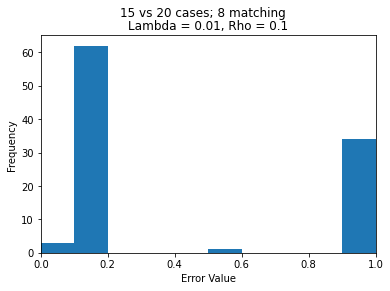

In [960]:
plt.hist(val, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Error Value')
plt.suptitle('15 vs 20 cases; 8 matching')
plt.title('Lambda = 0.01, Rho = 0.1')
plt.xlim(0,1)

(0.0, 1.0)

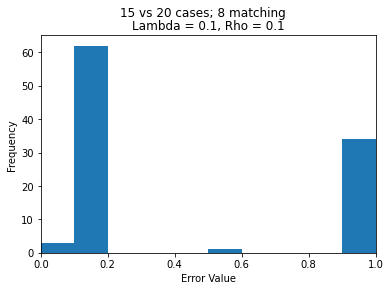

In [961]:
plt.hist(val_1, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Error Value')
plt.suptitle('15 vs 20 cases; 8 matching')
plt.title('Lambda = 0.1, Rho = 0.1')
plt.xlim(0,1)

(0.0, 1.0)

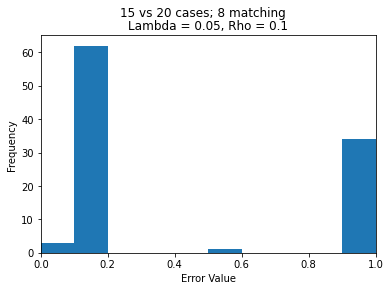

In [962]:
plt.hist(val_2, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Error Value')
plt.suptitle('15 vs 20 cases; 8 matching')
plt.title('Lambda = 0.05, Rho = 0.1')
plt.xlim(0,1)

In [ ]:
# plt.hist(val_3, bins=10)
# plt.ylabel('Frequency')
# plt.xlabel('Error Value')
# plt.suptitle('15 vs 20 cases; 8 matching')
# plt.title('Lambda = 2, Rho = 0.1')
# plt.xlim(0,1)

In [ ]:
# plt.hist(val_4, bins=10)
# plt.ylabel('Frequency')
# plt.xlabel('Error Value')
# plt.suptitle('15 vs 20 cases; 8 matching')
# plt.title('Lambda = 0.001, Rho = 0.1')
# plt.xlim(0,1)

In [963]:
fjc_8

,DEFLGKY,DISTRICT,SENTMON,SENTYR,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,FJDcode4,FJDcode5,FJDcode6,FJDcode7,FJDcode8,FJDcode9,FJDcode10,DOCKET,matchFlag
0,108541700019CR0100,85,2,2018,36.0,0,0,21846,21846,21843,21843,21843,21843,21843,21846,21846,21843,1700019,1
1,097431703151CR0010,74,4,2018,30.0,0,0,81324,81324,-8,-8,-8,81324,81324,-8,-8,-8,1703151,1
2,010431700183CR0010,4,12,2018,37.0,0,0,18922,-8,-8,-8,-8,18922,-8,-8,-8,-8,1700183,1
3,031351600409CR0010,13,1,2018,240.0,0,0,182113,-8,-8,-8,-8,182113,-8,-8,-8,-8,1600409,1
4,064321700042CR0020,43,11,2018,120.0,0,0,21846,21846,21846,21841,18922,21846,21846,21846,21841,18922,1700042,1
5,054241800456CR0010,42,10,2018,16.0,0,0,81326,-8,-8,-8,-8,81326,-8,-8,-8,-8,1800456,1
6,009011800150CR0010,90,11,2018,33.0,0,0,18751,-8,-8,-8,-8,18751,-8,-8,-8,-8,1800150,1
7,075611700204CR0010,56,10,2018,70.0,1000,0,21846,-8,-8,-8,-8,21846,-8,-8,-8,-8,1700204,1


In [964]:
ussc_8

,USSCIDN,DISTRICT,SENTMON,SENTYR,PRISTOT,FINETOT,PROBTOT,SENTTOT_new,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,matchFlag
0,2450241.0,85,2,2018,36.0,0,0,36.0,36.0,4670503.0,4670506.0,21960.0,NaN,NaN,1
1,2460626.0,74,4,2018,30.0,0,0,30.0,30.0,81326.0,81326.0,NaN,NaN,NaN,1
2,2513473.0,4,12,2018,37.0,0,0,37.0,37.0,18922.0,18924.0,182.0,NaN,NaN,1
3,2438719.0,13,1,2018,240.0,0,0,240.0,240.0,81326.0,81326.0,NaN,NaN,NaN,1
4,2501397.0,43,11,2018,120.0,0,0,120.0,120.0,21846.0,NaN,NaN,NaN,NaN,1
5,2497981.0,42,10,2018,16.0,0,0,16.0,16.0,81326.0,NaN,NaN,NaN,NaN,1
6,2504836.0,90,11,2018,33.0,0,0,33.0,33.0,18751.0,NaN,NaN,NaN,NaN,1
7,2496811.0,56,10,2018,70.0,1000,0,70.0,70.0,21841.0,21846.0,NaN,NaN,NaN,1


In [ ]:
#testing out COST MATRIX on UNIQUE matches

In [853]:
matches_8 = matches.sample(8)
matches_8

,ID,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,...,FJDcode10,USSCIDN,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,DOCKET
4097,4641848.0,10,2018,38,97.0,10000,0,182252.0,NaN,NaN,...,NaN,2499340.0,97.0,97.0,182252.0,182252.0,NaN,NaN,NaN,1700110.0
271,4553954.0,1,2018,87,78.0,0,0,21846.0,21841.0,21841.0,...,21841.0,2442752.0,78.0,78.0,21841.0,181956.0,21841.0,21846.0,NaN,1600119.0
6783,4762588.0,12,2018,78,60.0,0,0,182119.0,182119.0,18924.0,...,18924.0,2507128.0,60.0,60.0,18922.0,182119.0,18924.0,18924.0,NaN,1800188.0
3314,4615198.0,10,2018,15,84.0,0,0,21841.0,NaN,NaN,...,NaN,2496202.0,84.0,84.0,21841.0,21841.0,NaN,NaN,NaN,1700236.0
2000,4472424.0,7,2018,48,46.0,0,0,18922.0,18922.0,NaN,...,NaN,2475046.0,46.0,46.0,18922.0,NaN,NaN,NaN,NaN,1700129.0
4898,4791303.0,11,2018,30,168.0,0,0,182250.0,81326.0,NaN,...,NaN,2502877.0,168.0,168.0,81326.0,182250.0,NaN,NaN,NaN,1800080.0
6418,4699558.0,11,2018,50,84.0,0,0,21846.0,21841.0,NaN,...,NaN,2506140.0,84.0,84.0,21846.0,NaN,NaN,NaN,NaN,1700220.0
2100,4380745.0,7,2018,7,84.0,0,0,21846.0,18924.0,21841.0,...,21841.0,2477206.0,84.0,84.0,21841.0,21841.0,21846.0,NaN,NaN,1500257.0


In [854]:
#FJC_INFO = pd.merge(matches_8, fjc, on=['SENTMON', 'SENTYR', 'DISTRICT', 'PRISTOT', 'FINETOT', 'PROBTOT', "FJDcode1","FJDcode2","FJDcode3","FJDcode4","FJDcode5","FJDcode6","FJDcode7","FJDcode8","FJDcode9","FJDcode10"])
FJC_INFO = pd.merge(matches_8, fjc, on=['SENTMON', 'SENTYR', 'DISTRICT', 'PRISTOT', 'FINETOT', 'PROBTOT', "FJDcode1"])
FJC_INFO = FJC_INFO[['DEFLGKY','DISTRICT', 'SENTMON', 'SENTYR', 'PRISTOT', 'FINETOT', 'PROBTOT','FJDcode1','FJDcode2_x','FJDcode3_x','FJDcode4_x','FJDcode5_x','FJDcode6_x','FJDcode7_x','FJDcode8_x','FJDcode9_x','FJDcode10_x', 'DOCKET_x', 'matchFlag']]
FJC_INFO = FJC_INFO.rename({'FJDcode1_x': 'FJDcode1', 'FJDcode2_x': 'FJDcode2', 'FJDcode3_x': 'FJDcode3', 'FJDcode4_x':'FJDcode4', 'FJDcode5_x':'FJDcode5', 'FJDcode6_x':'FJDcode6', 'FJDcode7_x':'FJDcode7', 'FJDcode8_x':'FJDcode8', 'FJDcode9_x':'FJDcode9', 'FJDcode10_x':'FJDcode10', 'DOCKET_x':'DOCKET'}, axis=1)
FJC_INFO 

,DEFLGKY,DISTRICT,SENTMON,SENTYR,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,FJDcode4,FJDcode5,FJDcode6,FJDcode7,FJDcode8,FJDcode9,FJDcode10,DOCKET,matchFlag
0,053811700110CR0010,38,10,2018,97.0,10000,0,182252.0,NaN,NaN,NaN,NaN,182252.0,NaN,NaN,NaN,NaN,1700110.0,1
1,108751600119CR0130,87,1,2018,78.0,0,0,21846.0,21841.0,21841.0,21841.0,21843.0,21841.0,21846.0,21841.0,21841.0,21841.0,1600119.0,0
2,097821800188CR0010,78,12,2018,60.0,0,0,182119.0,182119.0,18924.0,18924.0,18922.0,18924.0,182119.0,18924.0,182119.0,18924.0,1800188.0,1
3,031521700236CR0010,15,10,2018,84.0,0,0,21841.0,NaN,NaN,NaN,NaN,21841.0,NaN,NaN,NaN,NaN,1700236.0,1
4,064811700129CR0010,48,7,2018,46.0,0,0,18922.0,18922.0,NaN,NaN,NaN,18922.0,18922.0,NaN,NaN,NaN,1700129.0,1
5,113A61800080CR0010,30,11,2018,168.0,0,0,182250.0,81326.0,NaN,NaN,NaN,182250.0,81326.0,NaN,NaN,NaN,1800080.0,1
6,065031700220CR0060,50,11,2018,84.0,0,0,21846.0,21841.0,NaN,NaN,NaN,21846.0,21841.0,NaN,NaN,NaN,1700220.0,1
7,020721500257CR0020,7,7,2018,84.0,0,0,21846.0,18924.0,21841.0,21841.0,181951.0,181951.0,21846.0,18924.0,21841.0,21841.0,1500257.0,1


In [855]:
ussc_vals = matches_8.USSCIDN

In [856]:
matches_8_df = matches_8[['USSCIDN' ]]

In [857]:
ussc_8 = pd.merge(matches_8_df, ussc, on=['USSCIDN'])
ussc_8

,USSCIDN,DISTRICT,SENTMON,SENTYR,PRISTOT,FINETOT,PROBTOT,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,matchFlag
0,2499340.0,38,10,2018,97.0,10000,0,97.0,97.0,182252.0,182252.0,NaN,NaN,NaN,1
1,2442752.0,87,1,2018,78.0,0,0,78.0,78.0,21841.0,181956.0,21841.0,21846.0,NaN,0
2,2507128.0,78,12,2018,60.0,0,0,60.0,60.0,18922.0,182119.0,18924.0,18924.0,NaN,1
3,2496202.0,15,10,2018,84.0,0,0,84.0,84.0,21841.0,21841.0,NaN,NaN,NaN,1
4,2475046.0,48,7,2018,46.0,0,0,46.0,46.0,18922.0,NaN,NaN,NaN,NaN,1
5,2502877.0,30,11,2018,168.0,0,0,168.0,168.0,81326.0,182250.0,NaN,NaN,NaN,1
6,2506140.0,50,11,2018,84.0,0,0,84.0,84.0,21846.0,NaN,NaN,NaN,NaN,1
7,2477206.0,7,7,2018,84.0,0,0,84.0,84.0,21841.0,21841.0,21846.0,NaN,NaN,1


In [858]:
fjc_8=FJC_INFO
fjc_8

,DEFLGKY,DISTRICT,SENTMON,SENTYR,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,FJDcode4,FJDcode5,FJDcode6,FJDcode7,FJDcode8,FJDcode9,FJDcode10,DOCKET,matchFlag
0,053811700110CR0010,38,10,2018,97.0,10000,0,182252.0,NaN,NaN,NaN,NaN,182252.0,NaN,NaN,NaN,NaN,1700110.0,1
1,108751600119CR0130,87,1,2018,78.0,0,0,21846.0,21841.0,21841.0,21841.0,21843.0,21841.0,21846.0,21841.0,21841.0,21841.0,1600119.0,0
2,097821800188CR0010,78,12,2018,60.0,0,0,182119.0,182119.0,18924.0,18924.0,18922.0,18924.0,182119.0,18924.0,182119.0,18924.0,1800188.0,1
3,031521700236CR0010,15,10,2018,84.0,0,0,21841.0,NaN,NaN,NaN,NaN,21841.0,NaN,NaN,NaN,NaN,1700236.0,1
4,064811700129CR0010,48,7,2018,46.0,0,0,18922.0,18922.0,NaN,NaN,NaN,18922.0,18922.0,NaN,NaN,NaN,1700129.0,1
5,113A61800080CR0010,30,11,2018,168.0,0,0,182250.0,81326.0,NaN,NaN,NaN,182250.0,81326.0,NaN,NaN,NaN,1800080.0,1
6,065031700220CR0060,50,11,2018,84.0,0,0,21846.0,21841.0,NaN,NaN,NaN,21846.0,21841.0,NaN,NaN,NaN,1700220.0,1
7,020721500257CR0020,7,7,2018,84.0,0,0,21846.0,18924.0,21841.0,21841.0,181951.0,181951.0,21846.0,18924.0,21841.0,21841.0,1500257.0,1


In [859]:
fjc_unmatch = fjc[fjc['matchFlag'] == 0].sample(7)
ussc_unmatch = ussc[ussc['matchFlag'] == 0].sample(12)

In [860]:
fjc_15 = pd.concat([fjc_8, fjc_unmatch],axis=0)
ussc_20 = pd.concat([ussc_8, ussc_unmatch],axis=0)

In [861]:
fjc_15.reset_index(drop=True, inplace=True)
ussc_20.reset_index(drop=True, inplace=True)

In [862]:
fjc_15 = fjc_15[['DEFLGKY',	'SENTMON',	'SENTYR', 'DISTRICT','PRISTOT',	'FINETOT',	'PROBTOT', 'FJDcode1', 'FJDcode2',	'FJDcode3',	'FJDcode4',	'FJDcode5',	'FJDcode6',	'FJDcode7',	'FJDcode8',	'FJDcode9',	'FJDcode10','matchFlag']]
fjc_15

,DEFLGKY,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,FJDcode4,FJDcode5,FJDcode6,FJDcode7,FJDcode8,FJDcode9,FJDcode10,matchFlag
0,053811700110CR0010,10,2018,38,97.0,10000,0,182252.0,NaN,NaN,NaN,NaN,182252.0,NaN,NaN,NaN,NaN,1
1,108751600119CR0130,1,2018,87,78.0,0,0,21846.0,21841.0,21841.0,21841.0,21843.0,21841.0,21846.0,21841.0,21841.0,21841.0,0
2,097821800188CR0010,12,2018,78,60.0,0,0,182119.0,182119.0,18924.0,18924.0,18922.0,18924.0,182119.0,18924.0,182119.0,18924.0,1
3,031521700236CR0010,10,2018,15,84.0,0,0,21841.0,NaN,NaN,NaN,NaN,21841.0,NaN,NaN,NaN,NaN,1
4,064811700129CR0010,7,2018,48,46.0,0,0,18922.0,18922.0,NaN,NaN,NaN,18922.0,18922.0,NaN,NaN,NaN,1
5,113A61800080CR0010,11,2018,30,168.0,0,0,182250.0,81326.0,NaN,NaN,NaN,182250.0,81326.0,NaN,NaN,NaN,1
6,065031700220CR0060,11,2018,50,84.0,0,0,21846.0,21841.0,NaN,NaN,NaN,21846.0,21841.0,NaN,NaN,NaN,1
7,020721500257CR0020,7,2018,7,84.0,0,0,21846.0,18924.0,21841.0,21841.0,181951.0,181951.0,21846.0,18924.0,21841.0,21841.0,1
8,108421703538CR0010,1,2018,84,2.0,0,0,81326.0,-8.0,-8.0,-8.0,-8.0,81326.0,-8.0,-8.0,-8.0,-8.0,0
9,054241800743CR0010,12,2018,42,0.0,0,0,81326.0,-8.0,-8.0,-8.0,-8.0,81326.0,-8.0,-8.0,-8.0,-8.0,0


In [863]:
ussc_20 = ussc_20[['USSCIDN',	'SENTMON',	'SENTYR',	'DISTRICT',	'PRISTOT',	'FINETOT',	'PROBTOT',	'floorSENTTOT',	'roundSENTTOT',	'USSCcode1',	'USSCcode2',	'USSCcode3',	'USSCcode4',	'USSCcode5',	'matchFlag']]
ussc_20

,USSCIDN,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,matchFlag
0,2499340.0,10,2018,38,97.00,10000,0,97.0,97.0,182252.0,182252.0,NaN,NaN,NaN,1
1,2442752.0,1,2018,87,78.00,0,0,78.0,78.0,21841.0,181956.0,21841.0,21846.0,NaN,0
2,2507128.0,12,2018,78,60.00,0,0,60.0,60.0,18922.0,182119.0,18924.0,18924.0,NaN,1
3,2496202.0,10,2018,15,84.00,0,0,84.0,84.0,21841.0,21841.0,NaN,NaN,NaN,1
4,2475046.0,7,2018,48,46.00,0,0,46.0,46.0,18922.0,NaN,NaN,NaN,NaN,1
5,2502877.0,11,2018,30,168.00,0,0,168.0,168.0,81326.0,182250.0,NaN,NaN,NaN,1
6,2506140.0,11,2018,50,84.00,0,0,84.0,84.0,21846.0,NaN,NaN,NaN,NaN,1
7,2477206.0,7,2018,7,84.00,0,0,84.0,84.0,21841.0,21841.0,21846.0,NaN,NaN,1
8,2448648.0,1,2018,5,12.03,0,0,12.0,12.0,21846.0,18924.0,21841.0,18924.0,21841.0,0
9,2470562.0,6,2018,40,0.03,0,0,0.0,0.0,18287.0,NaN,NaN,NaN,NaN,0


In [864]:
cost_matrix = np.zeros((20,15))

for i in range(20): # ussc
    for j in range(15): # fjc
        value = 0
        for x in range(1,7):
            if ussc_20.iloc[i,x] != fjc_15.iloc[j,x]:
                value=value+1
        new_value=1
        for k in range(9,14):
            if ussc_20.iloc[i,k] == fjc_15.iloc[j,7] or ussc_20.iloc[i,k]== fjc_15.iloc[j,8] or ussc_20.iloc[i,k]== fjc_15.iloc[j,9] or ussc_20.iloc[i,k]== fjc_15.iloc[j,10] or ussc_20.iloc[i,k]== fjc_15.iloc[j,11] or ussc_20.iloc[i,k]== fjc_15.iloc[j,12] or ussc_20.iloc[i,k]== fjc_15.iloc[j,13] or ussc_20.iloc[i,k]== fjc_15.iloc[j,14] or ussc_20.iloc[i,k]== fjc_15.iloc[j,15] or ussc_20.iloc[i,k]== fjc_15.iloc[j,16]:
                new_value=new_value - 1
                break
        cost_matrix[i][j] = value + new_value

lamb = 0.01 # entropic regularization
rho = 0.1 #enforces marginals 

lamb_4 = 0.001
lamb_1 = 0.1
lamb_2 = 0.05
lamb_3 = 2

n = 15 # number of records in FJC
m = 20 # number of records in USSC
k = 8 # number of matching records

a = np.ones(m)/m
b = np.ones(n)/n
M = cost_matrix

C = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb, rho)
C = C/np.max(C)
val.append(np.max([np.max(np.abs(C[0:k, 0:k] - np.identity(k))), np.max(C[k:n, 0:k]), np.max(C[0:k, k:m])]))

C_1 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_1, rho)
C_1 = C_1/np.max(C_1)
val_1.append(np.max([np.max(np.abs(C_1[0:k, 0:k] - np.identity(k))), np.max(C_1[k:n, 0:k]), np.max(C_1[0:k, k:m])]))

C_2 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_2, rho)
C_2 = C_2/np.max(C_2)
val_2.append(np.max([np.max(np.abs(C_2[0:k, 0:k] - np.identity(k))), np.max(C_2[k:n, 0:k]), np.max(C_2[0:k, k:m])]))

C_3 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_3, rho)
C_3 = C_3/np.max(C_3)
val_3.append(np.max([np.max(np.abs(C_3[0:k, 0:k] - np.identity(k))), np.max(C_3[k:n, 0:k]), np.max(C_3[0:k, k:m])]))

C_4 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_4, rho)
C_4 = C_4/np.max(C_4)
val_4.append(np.max([np.max(np.abs(C_4[0:k, 0:k] - np.identity(k))), np.max(C_4[k:n, 0:k]), np.max(C_4[0:k, k:m])]))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/unbalanced.py:398: RuntimeWarning: divide by zero encountered in true_divide
  u = (a / Kv) ** fi
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/unbalanced.py:407: UserWarning: Numerical errors at iteration 0
  warnings.warn('Numerical errors at iteration %s' % i)


In [ ]:
### the end of trying out cost matrix on UNIQUE matches

In [ ]:
##printing cost matrix and heat map for current values of M and Coupling Matrices

In [965]:
M

array([[0.2 , 3.2 , 3.2 , 3.2 , 3.2 , 3.2 , 3.2 , 4.2 , 3.2 , 3.2 , 3.2 ,
        3.2 , 2.2 , 3.2 , 2.2 ],
       [3.2 , 0.2 , 3.2 , 3.2 , 3.2 , 3.16, 3.2 , 4.2 , 2.2 , 3.2 , 3.16,
        2.2 , 3.16, 2.16, 3.16],
       [3.2 , 3.2 , 0.16, 3.2 , 3.16, 3.2 , 3.2 , 4.2 , 3.2 , 3.2 , 3.2 ,
        3.2 , 3.2 , 3.2 , 3.2 ],
       [3.2 , 3.2 , 3.2 , 0.2 , 3.2 , 3.16, 3.2 , 4.2 , 3.2 , 3.2 , 3.16,
        3.2 , 3.16, 3.16, 3.16],
       [3.16, 3.2 , 3.2 , 3.2 , 0.16, 3.2 , 2.2 , 4.16, 3.16, 2.2 , 3.2 ,
        2.2 , 3.2 , 3.2 , 3.2 ],
       [3.2 , 3.2 , 3.2 , 3.2 , 3.2 , 0.16, 3.2 , 3.2 , 3.2 , 2.2 , 3.16,
        3.2 , 2.16, 2.16, 3.16],
       [3.2 , 3.2 , 3.2 , 3.2 , 2.2 , 3.2 , 0.16, 4.2 , 3.2 , 2.2 , 3.2 ,
        2.2 , 3.2 , 3.2 , 3.2 ],
       [4.16, 4.2 , 4.2 , 4.2 , 4.16, 3.2 , 4.2 , 0.16, 4.16, 4.2 , 4.2 ,
        4.2 , 4.2 , 4.2 , 4.2 ],
       [3.2 , 3.2 , 3.2 , 2.2 , 3.2 , 2.2 , 3.2 , 4.2 , 3.2 , 2.2 , 3.2 ,
        3.2 , 2.2 , 2.2 , 3.2 ],
       [3.2 , 3.2 , 3.2 , 3.2 , 3.2 ,

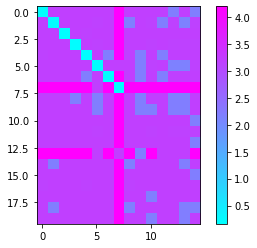

In [966]:
plt.imshow(M, cmap='cool', interpolation='nearest')
plt.colorbar()

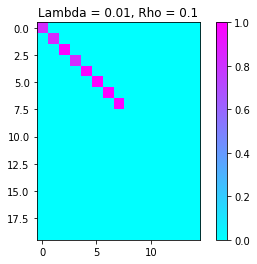

In [971]:
plt.imshow(C, cmap='cool', interpolation='nearest')
plt.title('Lambda = 0.01, Rho = 0.1')
plt.colorbar()

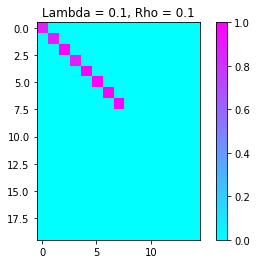

In [970]:
plt.imshow(C_1, cmap='cool', interpolation='nearest')
plt.title('Lambda = 0.1, Rho = 0.1')
plt.colorbar()

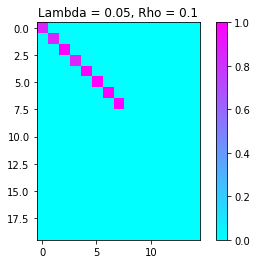

In [972]:
plt.imshow(C_2, cmap='cool', interpolation='nearest')
plt.title('Lambda = 0.05, Rho = 0.1')
plt.colorbar()

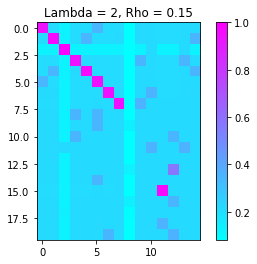

In [956]:
plt.imshow(C_3, cmap='cool', interpolation='nearest')
plt.title('Lambda = 2, Rho = 0.15')
plt.colorbar()

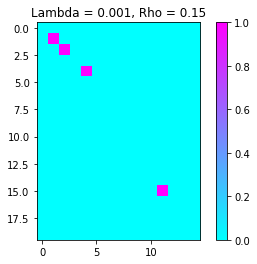

In [957]:
plt.imshow(C_4, cmap='cool', interpolation='nearest')
plt.title('Lambda = 0.001, Rho = 0.15')
plt.colorbar()

In [ ]:
###end of heat maps

In [632]:
#8 by 8 matching only
#trying out different matrices in unbalanced

#one giant for loop

val = []
val_1 = []
val_2 = []
val_3 = []
val_4 = []
val_5 = []

for g in range(100):
    
    #get a sample of 8 without any NA
    sample=0
    while sample==0:
        matches_8 = matches.sample(8)
        fjc_vals = matches_8.DEFLGKY
        ussc_vals = matches_8.USSCIDN
        sample=1
        for i in range(8):
            if type(fjc_vals.iloc[i]) == float:
                sample=0


    matches_8_df = matches_8[['DEFLGKY', 'USSCIDN' ]]
    ussc_8 = pd.merge(matches_8_df, ussc, on=['USSCIDN'])
    ussc_8 = ussc_8.drop(['DEFLGKY'], axis=1)

    fjc_8 = pd.merge(matches_8_df, fjc, on=['DEFLGKY'])
    fjc_8 = fjc_8.drop(['USSCIDN'], axis=1)

    fjc_15=fjc_8
    ussc_20=ussc_8

    fjc_15.reset_index(drop=True, inplace=True)
    ussc_20.reset_index(drop=True, inplace=True)

    fjc_15 = fjc_15[['DEFLGKY',	'SENTMON',	'SENTYR', 'DISTRICT',	'PRISTOT',	'FINETOT',	'PROBTOT', 'FJDcode1', 'FJDcode2',	'FJDcode3',	'FJDcode4',	'FJDcode5',	'FJDcode6',	'FJDcode7',	'FJDcode8',	'FJDcode9',	'FJDcode10',	'matchFlag']]
    ussc_20 = ussc_20[['USSCIDN',	'SENTMON',	'SENTYR',	'DISTRICT',	'PRISTOT',	'FINETOT',	'PROBTOT',	'floorSENTTOT',	'roundSENTTOT',	'USSCcode1',	'USSCcode2',	'USSCcode3',	'USSCcode4',	'USSCcode5',	'matchFlag']]

    cost_matrix = np.zeros((8,8))

    for i in range(8): # ussc
        for j in range(8): # fjc
            value = 0
            for x in range(1,7):
                if ussc_20.iloc[i,x] != fjc_15.iloc[j,x]:
                    value=value+1
            new_value=1
            for k in range(9,14):
                if ussc_20.iloc[i,k] == fjc_15.iloc[j,7] or ussc_20.iloc[i,k]== fjc_15.iloc[j,8] or ussc_20.iloc[i,k]== fjc_15.iloc[j,9] or ussc_20.iloc[i,k]== fjc_15.iloc[j,10] or ussc_20.iloc[i,k]== fjc_15.iloc[j,11] or ussc_20.iloc[i,k]== fjc_15.iloc[j,12] or ussc_20.iloc[i,k]== fjc_15.iloc[j,13] or ussc_20.iloc[i,k]== fjc_15.iloc[j,14] or ussc_20.iloc[i,k]== fjc_15.iloc[j,15] or ussc_20.iloc[i,k]== fjc_15.iloc[j,16]:
                    new_value=new_value-0.2
            cost_matrix[i][j] = value + new_value

            lamb = 0.01 # entropic regularization
            rho = 0.1 #enforces marginals 

            lamb_4 = 0.001
            lamb_1 = 0.1
            lamb_2 = 0.05
            lamb_3 = 2
            lamb_5 = 0.0001

            n = 8 # number of records in FJC
            m = 8 # number of records in USSC
            k = 8 # number of matching records

            a = np.ones(m)/m
            b = np.ones(n)/n
            M = cost_matrix

    C = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb, rho)
    C = C/np.max(C)
    val.append(np.max(np.abs(C[0:k, 0:k] - np.identity(k))))

    C_1 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_1, rho)
    C_1 = C_1/np.max(C_1)
    val_1.append(np.max(np.abs(C_1[0:k, 0:k] - np.identity(k))))

    C_2 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_2, rho)
    C_2 = C_2/np.max(C_2)
    val_2.append(np.max(np.abs(C_2[0:k, 0:k] - np.identity(k))))

    C_3 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_3, rho)
    C_3 = C_3/np.max(C_3)
    val_3.append(np.max(np.abs(C_3[0:k, 0:k] - np.identity(k))))

    C_4 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_4, rho)
    C_4 = C_4/np.max(C_4)
    val_4.append(np.max(np.abs(C_4[0:k, 0:k] - np.identity(k))))

    C_5 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_4, rho)
    C_5 = C_5/np.max(C_5)
    val_5.append(np.max(np.abs(C_5[0:k, 0:k] - np.identity(k))))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/unbalanced.py:398: RuntimeWarning: divide by zero encountered in true_divide
  u = (a / Kv) ** fi
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/unbalanced.py:407: UserWarning: Numerical errors at iteration 0
  warnings.warn('Numerical errors at iteration %s' % i)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/unbalanced.py:398: RuntimeWarning: divide by zero encountered in true_divide
  u = (a / Kv) ** fi
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/unbalanced.py:407: UserWarning: Numerical errors at iteration 0
  warnings.warn('Numerical errors at iteration %s' % i)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/unbalanced.py:398: RuntimeWarning: divide by zero encountered in true_divide
  u = (a / Kv) ** fi
/Library/Frameworks/Python.framework/Versions/3.10/

(0.0, 1.0)

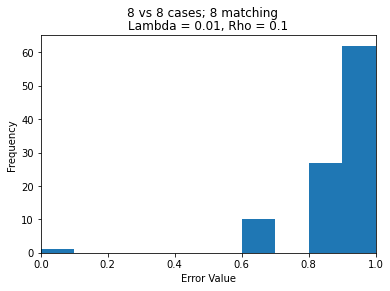

In [633]:
plt.hist(val, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Error Value')
plt.suptitle('8 vs 8 cases; 8 matching')
plt.title('Lambda = 0.01, Rho = 0.1')
plt.xlim(0,1)

(0.0, 1.0)

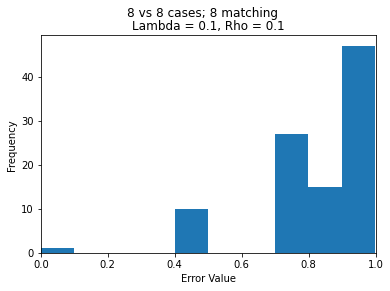

In [634]:
plt.hist(val_1, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Error Value')
plt.suptitle('8 vs 8 cases; 8 matching')
plt.title('Lambda = 0.1, Rho = 0.1')
plt.xlim(0,1)

(0.0, 1.0)

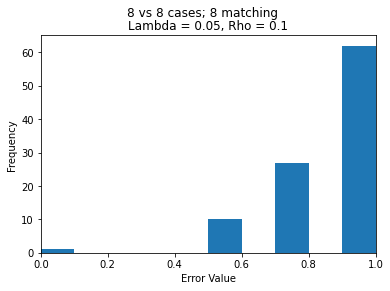

In [635]:
plt.hist(val_2, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Error Value')
plt.suptitle('8 vs 8 cases; 8 matching')
plt.title('Lambda = 0.05, Rho = 0.1')
plt.xlim(0,1)

(0.0, 1.0)

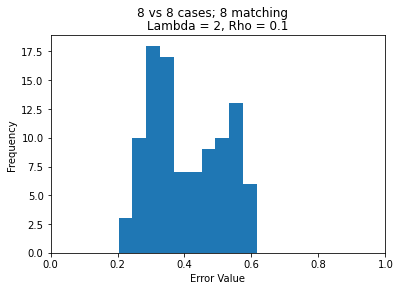

In [636]:
plt.hist(val_3, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Error Value')
plt.suptitle('8 vs 8 cases; 8 matching')
plt.title('Lambda = 2, Rho = 0.1')
plt.xlim(0,1)

(0.0, 1.0)

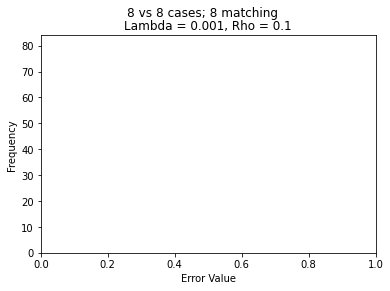

In [637]:
plt.hist(val_4, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Error Value')
plt.suptitle('8 vs 8 cases; 8 matching')
plt.title('Lambda = 0.001, Rho = 0.1')
plt.xlim(0,1)

(0.0, 1.0)

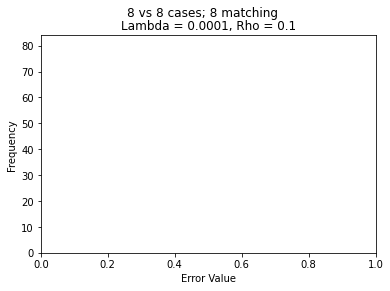

In [638]:
plt.hist(val_5, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Error Value')
plt.suptitle('8 vs 8 cases; 8 matching')
plt.title('Lambda = 0.0001, Rho = 0.1')
plt.xlim(0,1)

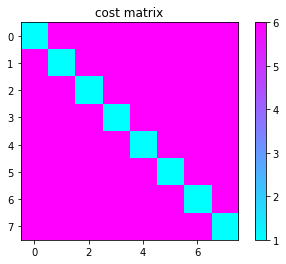

In [660]:
plt.imshow(M, cmap='cool', interpolation='nearest')
plt.title('cost matrix')
plt.colorbar()

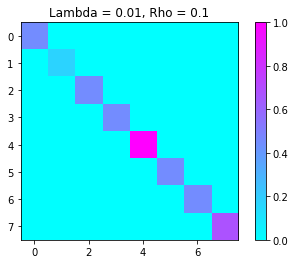

In [631]:
plt.imshow(C, cmap='cool', interpolation='nearest')
plt.title('Lambda = 0.01, Rho = 0.1')
plt.colorbar()

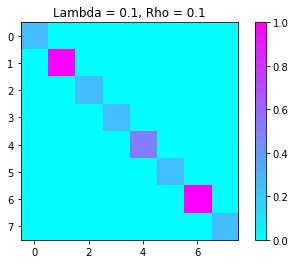

In [640]:
plt.imshow(C_1, cmap='cool', interpolation='nearest')
plt.title('Lambda = 0.1, Rho = 0.1')
plt.colorbar()

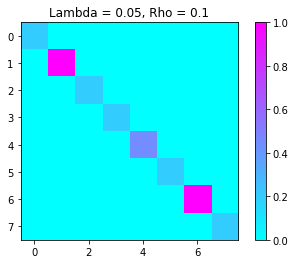

In [641]:
plt.imshow(C_2, cmap='cool', interpolation='nearest')
plt.title('Lambda = 0.05, Rho = 0.1')
plt.colorbar()

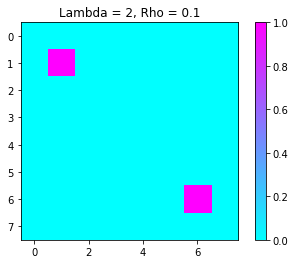

In [642]:
plt.imshow(C_4, cmap='cool', interpolation='nearest')
plt.title('Lambda = 2, Rho = 0.1')
plt.colorbar()

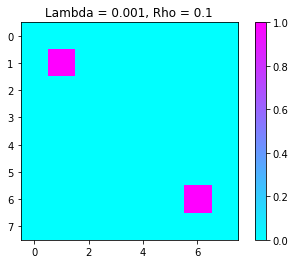

In [643]:
plt.imshow(C_4, cmap='cool', interpolation='nearest')
plt.title('Lambda = 0.001, Rho = 0.1')
plt.colorbar()

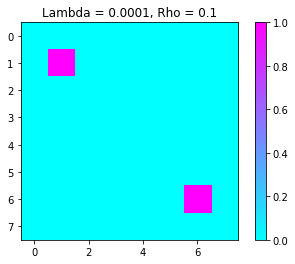

In [644]:
plt.imshow(C_4, cmap='cool', interpolation='nearest')
plt.title('Lambda = 0.0001, Rho = 0.1')
plt.colorbar()

In [612]:
#they are concentrating all the probability in certain points, so, why is that?
fjc_8

,DEFLGKY,DISTRICT,SENTMON,SENTYR,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,FJDcode4,FJDcode5,FJDcode6,FJDcode7,FJDcode8,FJDcode9,FJDcode10,DOCKET,matchFlag
0,054231802196CR0010,42,11,2018,87.0,0,0,21952,21952,21841,21841,-8,21952,21952,21841,21841,-8,1802196,1
1,113A81700543CR0030,30,3,2018,78.0,0,0,4670503,4670503,-8,-8,-8,4670503,4670503,-8,-8,-8,1700543,1
2,113A31700190CR0010,30,3,2018,57.0,0,0,18371,-8,-8,-8,-8,18371,-8,-8,-8,-8,1700190,1
3,054151800381CR0010,41,10,2018,26.0,0,0,81326,-8,-8,-8,-8,81326,-8,-8,-8,-8,1800381,1
4,075331730058CR0010,53,10,2018,21.0,0,0,181347,18641,181035,-8,-8,181347,18641,181035,-8,-8,1730058,1
5,097431703375CR0010,74,2,2018,18.0,0,0,81324,81324,-8,-8,-8,81324,81324,-8,-8,-8,1703375,1
6,097321600356CR0010,73,1,2018,84.0,0,0,218411,181029,181704,181708,181028,218411,181029,181028,181029,181704,1600356,1
7,064741700328CR0170,47,2,2018,18.0,0,0,181349,181956,-8,-8,-8,181349,181956,-8,-8,-8,1700328,1


In [613]:
ussc_8

,USSCIDN,DISTRICT,SENTMON,SENTYR,PRISTOT,FINETOT,PROBTOT,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,matchFlag
0,2504828.0,42,11,2018,87.0,0,0,87.0,87.0,21952.0,21960.0,NaN,NaN,NaN,1
1,2455691.0,30,3,2018,78.0,0,0,78.0,78.0,187.0,1813.0,NaN,NaN,NaN,1
2,2455305.0,30,3,2018,57.0,0,0,57.0,57.0,18922.0,NaN,NaN,NaN,NaN,1
3,2497773.0,41,10,2018,26.0,0,0,26.0,26.0,81326.0,81326.0,NaN,NaN,NaN,1
4,2493005.0,53,10,2018,21.0,0,0,21.0,21.0,181347.0,NaN,NaN,NaN,NaN,1
5,2452527.0,74,2,2018,18.0,0,0,18.0,18.0,81324.0,182.0,NaN,NaN,NaN,1
6,2441178.0,73,1,2018,84.0,0,0,84.0,84.0,187.0,1813.0,NaN,NaN,NaN,1
7,2451806.0,47,2,2018,18.0,0,0,18.0,18.0,21841.0,21841.0,21846.0,NaN,NaN,1


In [646]:
N=M
N

array([[1. , 4. , 4. , 4. , 6. , 4. , 4. , 4. ],
       [4. , 0.6, 4. , 4. , 6. , 4. , 4. , 4. ],
       [4. , 4. , 1. , 4. , 6. , 4. , 4. , 3. ],
       [4. , 4. , 4. , 1. , 6. , 4. , 4. , 4. ],
       [6. , 6. , 6. , 6. , 0.8, 6. , 6. , 6. ],
       [4. , 4. , 4. , 4. , 6. , 1. , 4. , 4. ],
       [4. , 4. , 4. , 4. , 6. , 4. , 0.6, 4. ],
       [4. , 4. , 3. , 4. , 6. , 4. , 4. , 1. ]])

In [648]:
for i in range(8):
    for j in range(8):
        if N[i][j]==3:
            N[i][j]=6
N

array([[1. , 6. , 6. , 6. , 6. , 6. , 6. , 6. ],
       [6. , 0.6, 6. , 6. , 6. , 6. , 6. , 6. ],
       [6. , 6. , 1. , 6. , 6. , 6. , 6. , 6. ],
       [6. , 6. , 6. , 1. , 6. , 6. , 6. , 6. ],
       [6. , 6. , 6. , 6. , 0.8, 6. , 6. , 6. ],
       [6. , 6. , 6. , 6. , 6. , 1. , 6. , 6. ],
       [6. , 6. , 6. , 6. , 6. , 6. , 0.6, 6. ],
       [6. , 6. , 6. , 6. , 6. , 6. , 6. , 1. ]])

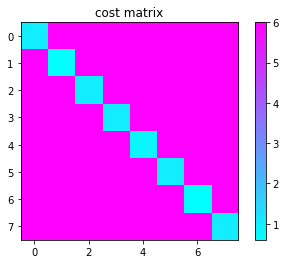

In [649]:
plt.imshow(N, cmap='cool', interpolation='nearest')
plt.title('cost matrix')
plt.colorbar()

In [650]:
C = ot.unbalanced.sinkhorn_unbalanced(a, b, N, lamb, rho)
C = C/np.max(C)
val.append(np.max(np.abs(C[0:k, 0:k] - np.identity(k))))

C_1 = ot.unbalanced.sinkhorn_unbalanced(a, b, N, lamb_1, rho)
C_1 = C_1/np.max(C_1)
val_1.append(np.max(np.abs(C_1[0:k, 0:k] - np.identity(k))))

C_2 = ot.unbalanced.sinkhorn_unbalanced(a, b, N, lamb_2, rho)
C_2 = C_2/np.max(C_2)
val_2.append(np.max(np.abs(C_2[0:k, 0:k] - np.identity(k))))

C_3 = ot.unbalanced.sinkhorn_unbalanced(a, b, N, lamb_3, rho)
C_3 = C_3/np.max(C_3)
val_3.append(np.max(np.abs(C_3[0:k, 0:k] - np.identity(k))))

C_4 = ot.unbalanced.sinkhorn_unbalanced(a, b, N, lamb_4, rho)
C_4 = C_4/np.max(C_4)
val_4.append(np.max(np.abs(C_4[0:k, 0:k] - np.identity(k))))

C_5 = ot.unbalanced.sinkhorn_unbalanced(a, b, N, lamb_4, rho)
C_5 = C_5/np.max(C_5)
val_5.append(np.max(np.abs(C_5[0:k, 0:k] - np.identity(k))))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/unbalanced.py:398: RuntimeWarning: divide by zero encountered in true_divide
  u = (a / Kv) ** fi
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/unbalanced.py:407: UserWarning: Numerical errors at iteration 0
  warnings.warn('Numerical errors at iteration %s' % i)


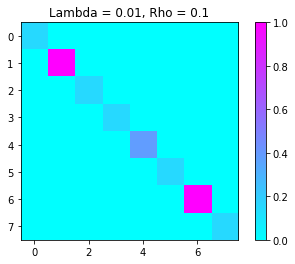

In [651]:
plt.imshow(C, cmap='cool', interpolation='nearest')
plt.title('Lambda = 0.01, Rho = 0.1')
plt.colorbar()

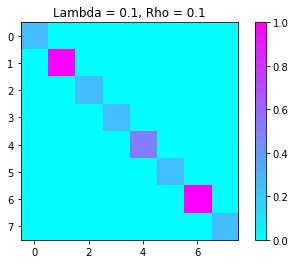

In [652]:
plt.imshow(C_1, cmap='cool', interpolation='nearest')
plt.title('Lambda = 0.1, Rho = 0.1')
plt.colorbar()

In [653]:
for i in range(8):
    for j in range(8):
        if i==j:
            N[i][j]=1
N

array([[1., 6., 6., 6., 6., 6., 6., 6.],
       [6., 1., 6., 6., 6., 6., 6., 6.],
       [6., 6., 1., 6., 6., 6., 6., 6.],
       [6., 6., 6., 1., 6., 6., 6., 6.],
       [6., 6., 6., 6., 1., 6., 6., 6.],
       [6., 6., 6., 6., 6., 1., 6., 6.],
       [6., 6., 6., 6., 6., 6., 1., 6.],
       [6., 6., 6., 6., 6., 6., 6., 1.]])

In [654]:
C = ot.unbalanced.sinkhorn_unbalanced(a, b, N, lamb, rho)
C = C/np.max(C)
val.append(np.max(np.abs(C[0:k, 0:k] - np.identity(k))))

C_1 = ot.unbalanced.sinkhorn_unbalanced(a, b, N, lamb_1, rho)
C_1 = C_1/np.max(C_1)
val_1.append(np.max(np.abs(C_1[0:k, 0:k] - np.identity(k))))

C_2 = ot.unbalanced.sinkhorn_unbalanced(a, b, N, lamb_2, rho)
C_2 = C_2/np.max(C_2)
val_2.append(np.max(np.abs(C_2[0:k, 0:k] - np.identity(k))))

C_3 = ot.unbalanced.sinkhorn_unbalanced(a, b, N, lamb_3, rho)
C_3 = C_3/np.max(C_3)
val_3.append(np.max(np.abs(C_3[0:k, 0:k] - np.identity(k))))

C_4 = ot.unbalanced.sinkhorn_unbalanced(a, b, N, lamb_4, rho)
C_4 = C_4/np.max(C_4)
val_4.append(np.max(np.abs(C_4[0:k, 0:k] - np.identity(k))))

C_5 = ot.unbalanced.sinkhorn_unbalanced(a, b, N, lamb_4, rho)
C_5 = C_5/np.max(C_5)
val_5.append(np.max(np.abs(C_5[0:k, 0:k] - np.identity(k))))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/unbalanced.py:398: RuntimeWarning: divide by zero encountered in true_divide
  u = (a / Kv) ** fi
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/unbalanced.py:407: UserWarning: Numerical errors at iteration 0
  warnings.warn('Numerical errors at iteration %s' % i)
/var/folders/rp/lgskb8cx1vzgzb8nb18p5vxw0000gn/T/ipykernel_8323/3395225279.py:18: RuntimeWarning: invalid value encountered in true_divide
  C_4 = C_4/np.max(C_4)
/var/folders/rp/lgskb8cx1vzgzb8nb18p5vxw0000gn/T/ipykernel_8323/3395225279.py:22: RuntimeWarning: invalid value encountered in true_divide
  C_5 = C_5/np.max(C_5)


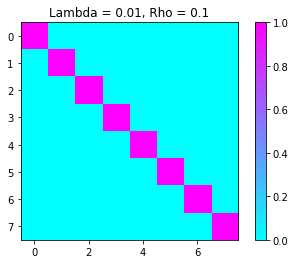

In [655]:
plt.imshow(C, cmap='cool', interpolation='nearest')
plt.title('Lambda = 0.01, Rho = 0.1')
plt.colorbar()

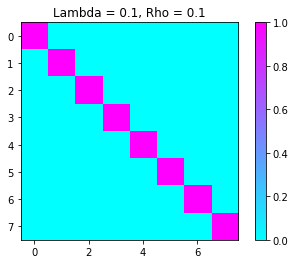

In [656]:
plt.imshow(C_1, cmap='cool', interpolation='nearest')
plt.title('Lambda = 0.1, Rho = 0.1')
plt.colorbar()

In [661]:
#get a sample of 8 without any NA
sample=0
while sample==0:
    matches_8 = matches.sample(8)
    fjc_vals = matches_8.DEFLGKY
    ussc_vals = matches_8.USSCIDN
    sample=1
    for i in range(8):
        if type(fjc_vals.iloc[i]) == float:
            sample=0


matches_8_df = matches_8[['DEFLGKY', 'USSCIDN' ]]
ussc_8 = pd.merge(matches_8_df, ussc, on=['USSCIDN'])
ussc_8 = ussc_8.drop(['DEFLGKY'], axis=1)

fjc_8 = pd.merge(matches_8_df, fjc, on=['DEFLGKY'])
fjc_8 = fjc_8.drop(['USSCIDN'], axis=1)

fjc_15=fjc_8
ussc_20=ussc_8

fjc_15.reset_index(drop=True, inplace=True)
ussc_20.reset_index(drop=True, inplace=True)

fjc_15 = fjc_15[['DEFLGKY',	'SENTMON',	'SENTYR', 'DISTRICT',	'PRISTOT',	'FINETOT',	'PROBTOT', 'FJDcode1', 'FJDcode2',	'FJDcode3',	'FJDcode4',	'FJDcode5',	'FJDcode6',	'FJDcode7',	'FJDcode8',	'FJDcode9',	'FJDcode10',	'matchFlag']]
ussc_20 = ussc_20[['USSCIDN',	'SENTMON',	'SENTYR',	'DISTRICT',	'PRISTOT',	'FINETOT',	'PROBTOT',	'floorSENTTOT',	'roundSENTTOT',	'USSCcode1',	'USSCcode2',	'USSCcode3',	'USSCcode4',	'USSCcode5',	'matchFlag']]

cost_matrix = np.zeros((8,8))

for i in range(8): # ussc
    for j in range(8): # fjc
        value = 0
        for x in range(1,7):
            if ussc_20.iloc[i,x] != fjc_15.iloc[j,x]:
                value=value+1
        new_value=1
        for k in range(9,14):
            if ussc_20.iloc[i,k] == fjc_15.iloc[j,7] or ussc_20.iloc[i,k]== fjc_15.iloc[j,8] or ussc_20.iloc[i,k]== fjc_15.iloc[j,9] or ussc_20.iloc[i,k]== fjc_15.iloc[j,10] or ussc_20.iloc[i,k]== fjc_15.iloc[j,11] or ussc_20.iloc[i,k]== fjc_15.iloc[j,12] or ussc_20.iloc[i,k]== fjc_15.iloc[j,13] or ussc_20.iloc[i,k]== fjc_15.iloc[j,14] or ussc_20.iloc[i,k]== fjc_15.iloc[j,15] or ussc_20.iloc[i,k]== fjc_15.iloc[j,16]:
                new_value=new_value-0.2
        cost_matrix[i][j] = value + new_value

        lamb = 0.01 # entropic regularization
        rho = 0.1 #enforces marginals 

        lamb_4 = 0.001
        lamb_1 = 0.1
        lamb_2 = 0.05
        lamb_3 = 2
        lamb_5 = 0.0001

        n = 8 # number of records in FJC
        m = 8 # number of records in USSC
        k = 8 # number of matching records

        a = np.ones(m)/m
        b = np.ones(n)/n
        M = cost_matrix

In [663]:

L=M
for i in range(8):
    for j in range(8):
        if i==j:
            L[i][j]=1
L

array([[1. , 5. , 5. , 4. , 4. , 4. , 5. , 4. ],
       [5. , 1. , 2.6, 4. , 5. , 4. , 3. , 4. ],
       [5. , 3. , 1. , 4. , 5. , 4. , 4. , 4. ],
       [4. , 4. , 4. , 1. , 5. , 3. , 4. , 3. ],
       [4. , 5. , 4.6, 5. , 1. , 5. , 4.8, 5. ],
       [4. , 4. , 4. , 3. , 5. , 1. , 4. , 2. ],
       [5. , 2.8, 3.8, 4. , 5. , 4. , 1. , 4. ],
       [4. , 4. , 4. , 3. , 5. , 2. , 4. , 1. ]])

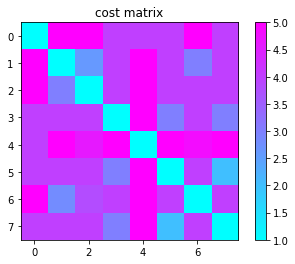

In [664]:
plt.imshow(L, cmap='cool', interpolation='nearest')
plt.title('cost matrix')
plt.colorbar()

In [665]:
C = ot.unbalanced.sinkhorn_unbalanced(a, b, L, lamb, rho)
C = C/np.max(C)
val.append(np.max(np.abs(C[0:k, 0:k] - np.identity(k))))

C_1 = ot.unbalanced.sinkhorn_unbalanced(a, b, L, lamb_1, rho)
C_1 = C_1/np.max(C_1)
val_1.append(np.max(np.abs(C_1[0:k, 0:k] - np.identity(k))))

C_2 = ot.unbalanced.sinkhorn_unbalanced(a, b, L, lamb_2, rho)
C_2 = C_2/np.max(C_2)
val_2.append(np.max(np.abs(C_2[0:k, 0:k] - np.identity(k))))

C_3 = ot.unbalanced.sinkhorn_unbalanced(a, b, L, lamb_3, rho)
C_3 = C_3/np.max(C_3)
val_3.append(np.max(np.abs(C_3[0:k, 0:k] - np.identity(k))))

C_4 = ot.unbalanced.sinkhorn_unbalanced(a, b, L, lamb_4, rho)
C_4 = C_4/np.max(C_4)
val_4.append(np.max(np.abs(C_4[0:k, 0:k] - np.identity(k))))

C_5 = ot.unbalanced.sinkhorn_unbalanced(a, b, L, lamb_4, rho)
C_5 = C_5/np.max(C_5)
val_5.append(np.max(np.abs(C_5[0:k, 0:k] - np.identity(k))))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/unbalanced.py:398: RuntimeWarning: divide by zero encountered in true_divide
  u = (a / Kv) ** fi
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/unbalanced.py:407: UserWarning: Numerical errors at iteration 0
  warnings.warn('Numerical errors at iteration %s' % i)
/var/folders/rp/lgskb8cx1vzgzb8nb18p5vxw0000gn/T/ipykernel_8323/1517427042.py:18: RuntimeWarning: invalid value encountered in true_divide
  C_4 = C_4/np.max(C_4)
/var/folders/rp/lgskb8cx1vzgzb8nb18p5vxw0000gn/T/ipykernel_8323/1517427042.py:22: RuntimeWarning: invalid value encountered in true_divide
  C_5 = C_5/np.max(C_5)


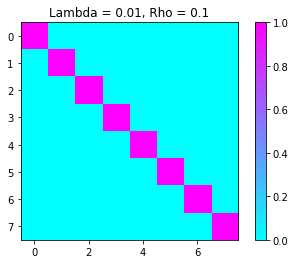

In [668]:
plt.imshow(C, cmap='cool', interpolation='nearest')
plt.title('Lambda = 0.01, Rho = 0.1')
plt.colorbar()

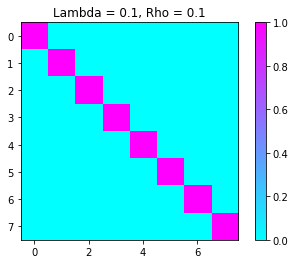

In [667]:
plt.imshow(C_1, cmap='cool', interpolation='nearest')
plt.title('Lambda = 0.1, Rho = 0.1')
plt.colorbar()

In [670]:
val = []
val_1 = []
val_2 = []
val_3 = []
val_4 = []
    
#get a sample of 8 without any NA
sample=0
while sample==0:
    matches_8 = matches.sample(8)
    fjc_vals = matches_8.DEFLGKY
    ussc_vals = matches_8.USSCIDN
    sample=1
    for i in range(8):
        if type(fjc_vals.iloc[i]) == float:
            sample=0


matches_8_df = matches_8[['DEFLGKY', 'USSCIDN' ]]
ussc_8 = pd.merge(matches_8_df, ussc, on=['USSCIDN'])
ussc_8 = ussc_8.drop(['DEFLGKY'], axis=1)

fjc_8 = pd.merge(matches_8_df, fjc, on=['DEFLGKY'])
fjc_8 = fjc_8.drop(['USSCIDN'], axis=1)

fjc_unmatch = fjc[fjc['matchFlag'] == 0].sample(7)
ussc_unmatch = ussc[ussc['matchFlag'] == 0].sample(12)

fjc_15 = pd.concat([fjc_8, fjc_unmatch],axis=0)
ussc_20 = pd.concat([ussc_8, ussc_unmatch],axis=0)

fjc_15.reset_index(drop=True, inplace=True)
ussc_20.reset_index(drop=True, inplace=True)

fjc_15 = fjc_15[['DEFLGKY',	'SENTMON',	'SENTYR', 'DISTRICT',	'PRISTOT',	'FINETOT',	'PROBTOT', 'FJDcode1', 'FJDcode2',	'FJDcode3',	'FJDcode4',	'FJDcode5',	'FJDcode6',	'FJDcode7',	'FJDcode8',	'FJDcode9',	'FJDcode10',	'matchFlag']]
ussc_20 = ussc_20[['USSCIDN',	'SENTMON',	'SENTYR',	'DISTRICT',	'PRISTOT',	'FINETOT',	'PROBTOT',	'floorSENTTOT',	'roundSENTTOT',	'USSCcode1',	'USSCcode2',	'USSCcode3',	'USSCcode4',	'USSCcode5',	'matchFlag']]

cost_matrix = np.zeros((20,15))

for i in range(20): # ussc
    for j in range(15): # fjc
        value = 0
        for x in range(1,7):
            if ussc_20.iloc[i,x] != fjc_15.iloc[j,x]:
                value=value+1
        new_value=1
        for k in range(9,14):
            if ussc_20.iloc[i,k] == fjc_15.iloc[j,7] or ussc_20.iloc[i,k]== fjc_15.iloc[j,8] or ussc_20.iloc[i,k]== fjc_15.iloc[j,9] or ussc_20.iloc[i,k]== fjc_15.iloc[j,10] or ussc_20.iloc[i,k]== fjc_15.iloc[j,11] or ussc_20.iloc[i,k]== fjc_15.iloc[j,12] or ussc_20.iloc[i,k]== fjc_15.iloc[j,13] or ussc_20.iloc[i,k]== fjc_15.iloc[j,14] or ussc_20.iloc[i,k]== fjc_15.iloc[j,15] or ussc_20.iloc[i,k]== fjc_15.iloc[j,16]:
                new_value=new_value-0.2
        cost_matrix[i][j] = value + new_value

        lamb = 0.01 # entropic regularization
        rho = 0.1 #enforces marginals 

        lamb_4 = 0.001
        lamb_1 = 0.1
        lamb_2 = 0.05
        lamb_3 = 2

        n = 15 # number of records in FJC
        m = 20 # number of records in USSC
        k = 8 # number of matching records

        a = np.ones(m)/m
        b = np.ones(n)/n
        M = cost_matrix


In [ ]:
for i in range(8):
    for j in range(8):
        if i==j:
            M[i][j]=0

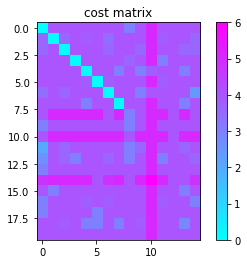

In [673]:
plt.imshow(M, cmap='cool', interpolation='nearest')
plt.title('cost matrix')
plt.colorbar()

In [674]:

C = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb, rho)
C = C/np.max(C)
val.append(np.max([np.max(np.abs(C[0:k, 0:k] - np.identity(k))), np.max(C[k:n, 0:k]), np.max(C[0:k, k:m])]))

C_1 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_1, rho)
C_1 = C_1/np.max(C_1)
val_1.append(np.max([np.max(np.abs(C_1[0:k, 0:k] - np.identity(k))), np.max(C_1[k:n, 0:k]), np.max(C_1[0:k, k:m])]))

C_2 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_2, rho)
C_2 = C_2/np.max(C_2)
val_2.append(np.max([np.max(np.abs(C_2[0:k, 0:k] - np.identity(k))), np.max(C_2[k:n, 0:k]), np.max(C_2[0:k, k:m])]))

C_3 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_3, rho)
C_3 = C_3/np.max(C_3)
val_3.append(np.max([np.max(np.abs(C_3[0:k, 0:k] - np.identity(k))), np.max(C_3[k:n, 0:k]), np.max(C_3[0:k, k:m])]))

C_4 = ot.unbalanced.sinkhorn_unbalanced(a, b, M, lamb_4, rho)
C_4 = C_4/np.max(C_4)
val_4.append(np.max([np.max(np.abs(C_4[0:k, 0:k] - np.identity(k))), np.max(C_4[k:n, 0:k]), np.max(C_4[0:k, k:m])]))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/unbalanced.py:398: RuntimeWarning: divide by zero encountered in true_divide
  u = (a / Kv) ** fi
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/unbalanced.py:407: UserWarning: Numerical errors at iteration 0
  warnings.warn('Numerical errors at iteration %s' % i)


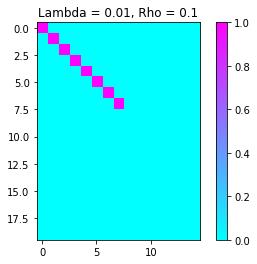

In [675]:
plt.imshow(C, cmap='cool', interpolation='nearest')
plt.title('Lambda = 0.01, Rho = 0.1')
plt.colorbar()

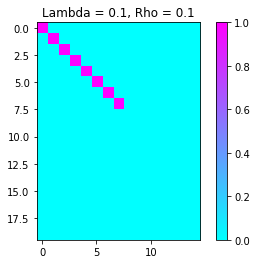

In [676]:
plt.imshow(C_1, cmap='cool', interpolation='nearest')
plt.title('Lambda = 0.1, Rho = 0.1')
plt.colorbar()